# Corrosion Detection 

### Detection of corrosion using Image Processing

In [2]:
import cv2
import PIL
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def cv_imread(file_path):
    cv_img = cv2.imdecode(np.fromfile("Images/testimg1.jpeg", dtype=np.uint8), -1)
    return cv_img
file_path = 'Images/testimg1.jpeg'
img = cv_imread(file_path)
print(img)

[[[ 20  68 132]
  [ 10  58 122]
  [ 25  70 137]
  ...
  [ 54  85 164]
  [ 51  85 168]
  [ 42  78 162]]

 [[ 19  63 127]
  [ 15  59 123]
  [ 22  66 130]
  ...
  [ 53  85 161]
  [ 64  99 179]
  [ 43  80 162]]

 [[ 20  58 122]
  [ 39  77 141]
  [ 68 106 171]
  ...
  [ 31  63 138]
  [  0  28 104]
  [ 11  47 125]]

 ...

 [[ 43  88 145]
  [ 57 103 157]
  [ 40  87 143]
  ...
  [ 36  87 179]
  [ 31  82 174]
  [ 32  83 175]]

 [[  8  62 123]
  [ 10  64 124]
  [ 10  61 123]
  ...
  [ 34  84 167]
  [ 28  72 163]
  [ 24  64 160]]

 [[ 17  74 136]
  [ 21  78 140]
  [ 21  75 138]
  ...
  [ 28  77 157]
  [ 34  73 165]
  [ 34  69 166]]]


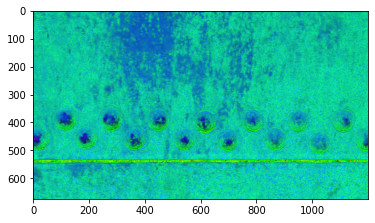

In [4]:
src_path = "Images/testimg1.jpeg"
img= cv2.imread(src_path)
im1=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(im1)

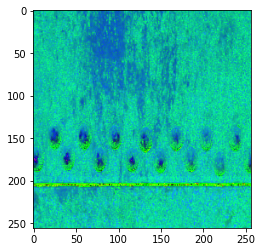

In [5]:
IMG = cv2.resize(im1, (256, 256), interpolation = cv2.INTER_NEAREST) 
plt.imshow(IMG)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

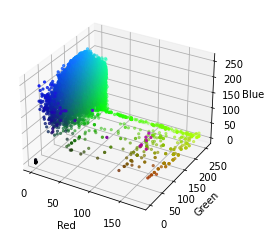

In [7]:
r, g, b = cv2.split(IMG)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = IMG.reshape((np.shape(IMG)[0]*np.shape(IMG)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

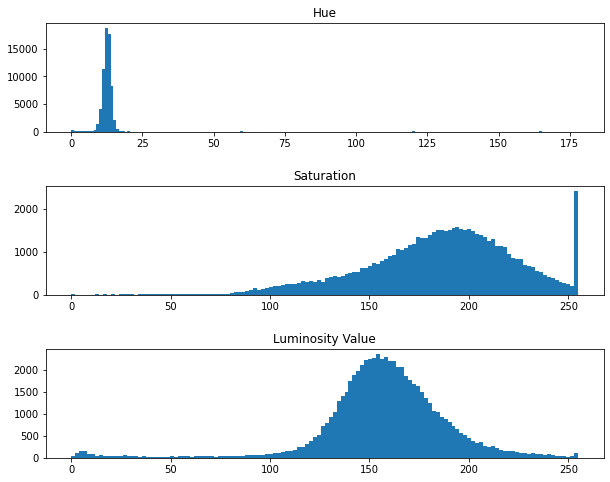

array([[132, 147, 131, ..., 147, 141, 136],
       [122, 187, 150, ..., 217, 122, 151],
       [126, 121, 163, ..., 136, 126, 109],
       ...,
       [155, 156, 166, ..., 143, 203, 153],
       [145, 162, 128, ..., 127, 213, 200],
       [145, 151, 125, ..., 180, 169, 165]], dtype=uint8)

In [8]:
from matplotlib import pyplot as plt
import cv2


cv2.cvtColor(IMG, cv2.COLOR_RGB2HSV)

H, S, V = IMG[:,:,0],IMG[:,:,1],IMG[:,:,2]

plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(H), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(S), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(V), bins=128)
plt.show()
V

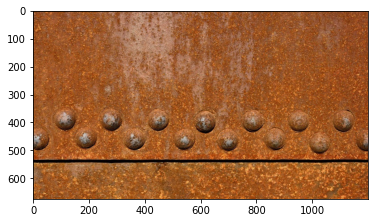

In [9]:
Org= cv2.imread('Images/testimg1.jpeg')
org = cv2.cvtColor(Org, cv2.COLOR_BGR2RGB)
frame=cv2.cvtColor(Org, cv2.COLOR_BGR2HSV)
plt.imshow(org)

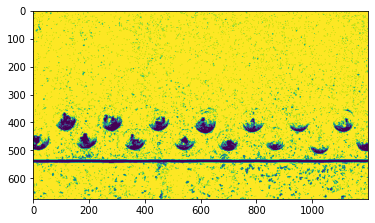

In [10]:
lower = np.array([0, 75, 110])
upper = np.array([23,255, 220])

    
mask = cv2.inRange(frame, lower, upper)
plt.imshow(mask)

In [22]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours): 
    area = cv2.contourArea(contour)

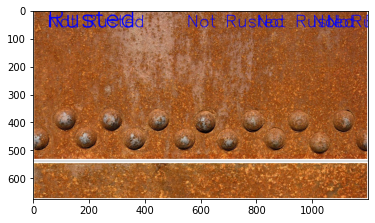

In [23]:
if(area > 1050000): 
  x, y, w, h = cv2.boundingRect(contour) 
  org= cv2.rectangle(org, (x, y), (x + w, y + h), (255, 255, 255), 5) 
  cv2.putText(org, "Rusted", (50, 60),cv2.FONT_HERSHEY_SIMPLEX, 3.0, (0, 1, 255),3)  
else:
  cv2.putText(org, "Not Rusted", (800, 60),cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 0, 255),2)
plt.imshow(org)